In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
def simulation(lmbd, mu, theta, initial_population, total_time):
    time = []
    population = []

    lmbd_n = lambda n: n * lmbd + theta
    mu_n = lambda n: n * mu

    population = []
    time = []

    current_time = 0
    current_population = initial_population

    while current_time < total_time:
        growth_rate = lmbd_n(current_population) + theta
        death_rate = mu_n(current_population)

        v = growth_rate + death_rate
        delay = np.random.exponential(1 / v)

        if delay < 1e-5:
            break

        current_time += delay
        growth = np.random.uniform() < growth_rate / v

        if growth:
            current_population += 1
        else:
            current_population -= 1

        population.append(current_population)
        time.append(current_time)

    def expected_population(t, eps=1e-6):
        rate = theta / (lmbd - mu + eps)
        e = np.exp((lmbd - mu + eps) * t)

        return (rate + initial_population) * e - rate

    v_time = np.array(time)
    v_pop = np.array(population)

    plt.plot(v_time, v_pop)
    plt.plot(v_time, expected_population(v_time))
    plt.show()

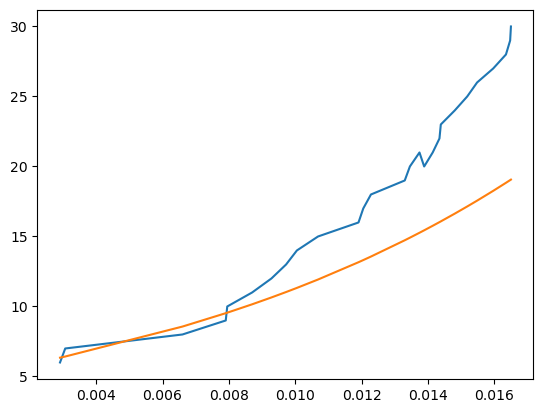

In [65]:
lmbd = 100
mu = 20
theta = 10
initial_population = 5

total_time = 1000

simulation(lmbd, mu, theta, initial_population, total_time)

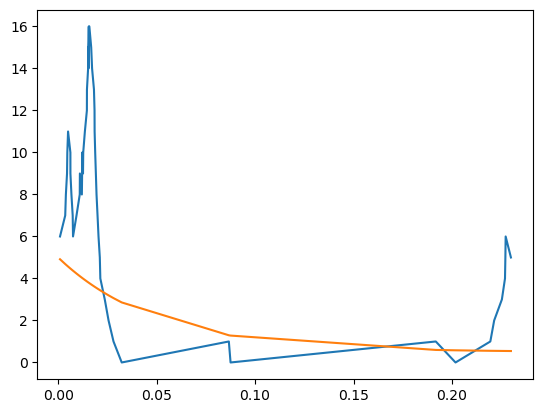

In [67]:
lmbd = 100
mu = 120
theta = 10
initial_population = 5

total_time = 1000

simulation(lmbd, mu, theta, initial_population, total_time)

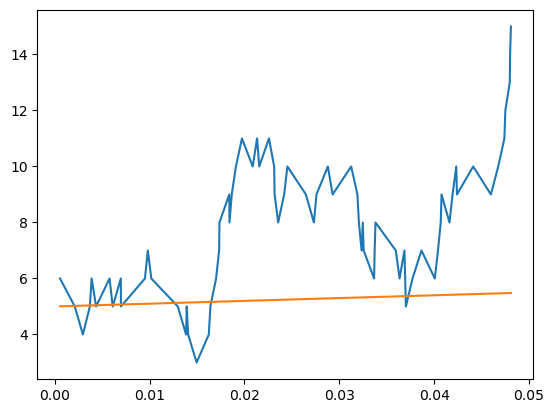

In [68]:
lmbd = 100
mu = 100
theta = 10
initial_population = 5

total_time = 1000

simulation(lmbd, mu, theta, initial_population, total_time)